# Task 3 - Exploratory Data Analysis - Retail

In [1]:
# Import Libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
superstore=pd.read_csv("C:\\Users\\Vineet Bhatia\\Desktop\\GRIPS\\SampleSuperstore.csv")

In [3]:
# Shape of the data
superstore.shape

(9994, 13)

In [4]:
# Deleting Duplicates
superstore=superstore.drop_duplicates()
print('Shape After deleting duplicate values:', superstore.shape)

Shape After deleting duplicate values: (9977, 13)


In [5]:
# Reading the dataset
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
superstore.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
# Checking null values
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Description of the data
superstore.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200


In [9]:
# Finding unique values
UniqueValues=superstore.columns
print("Number of unique values are as below:")
for i in UniqueValues:
    uniqueValues=superstore[i].nunique()
    print(i,uniqueValues)

Number of unique values are as below:
Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [11]:
superstore.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
# Categorical Columns
#Ship Mode, Segment, Country, Region, Category, Sun-Category

# Continuous Columns
# State, Postal Code, Sales, Quantity, Discount, Profit

# Exploratory Data Analysis

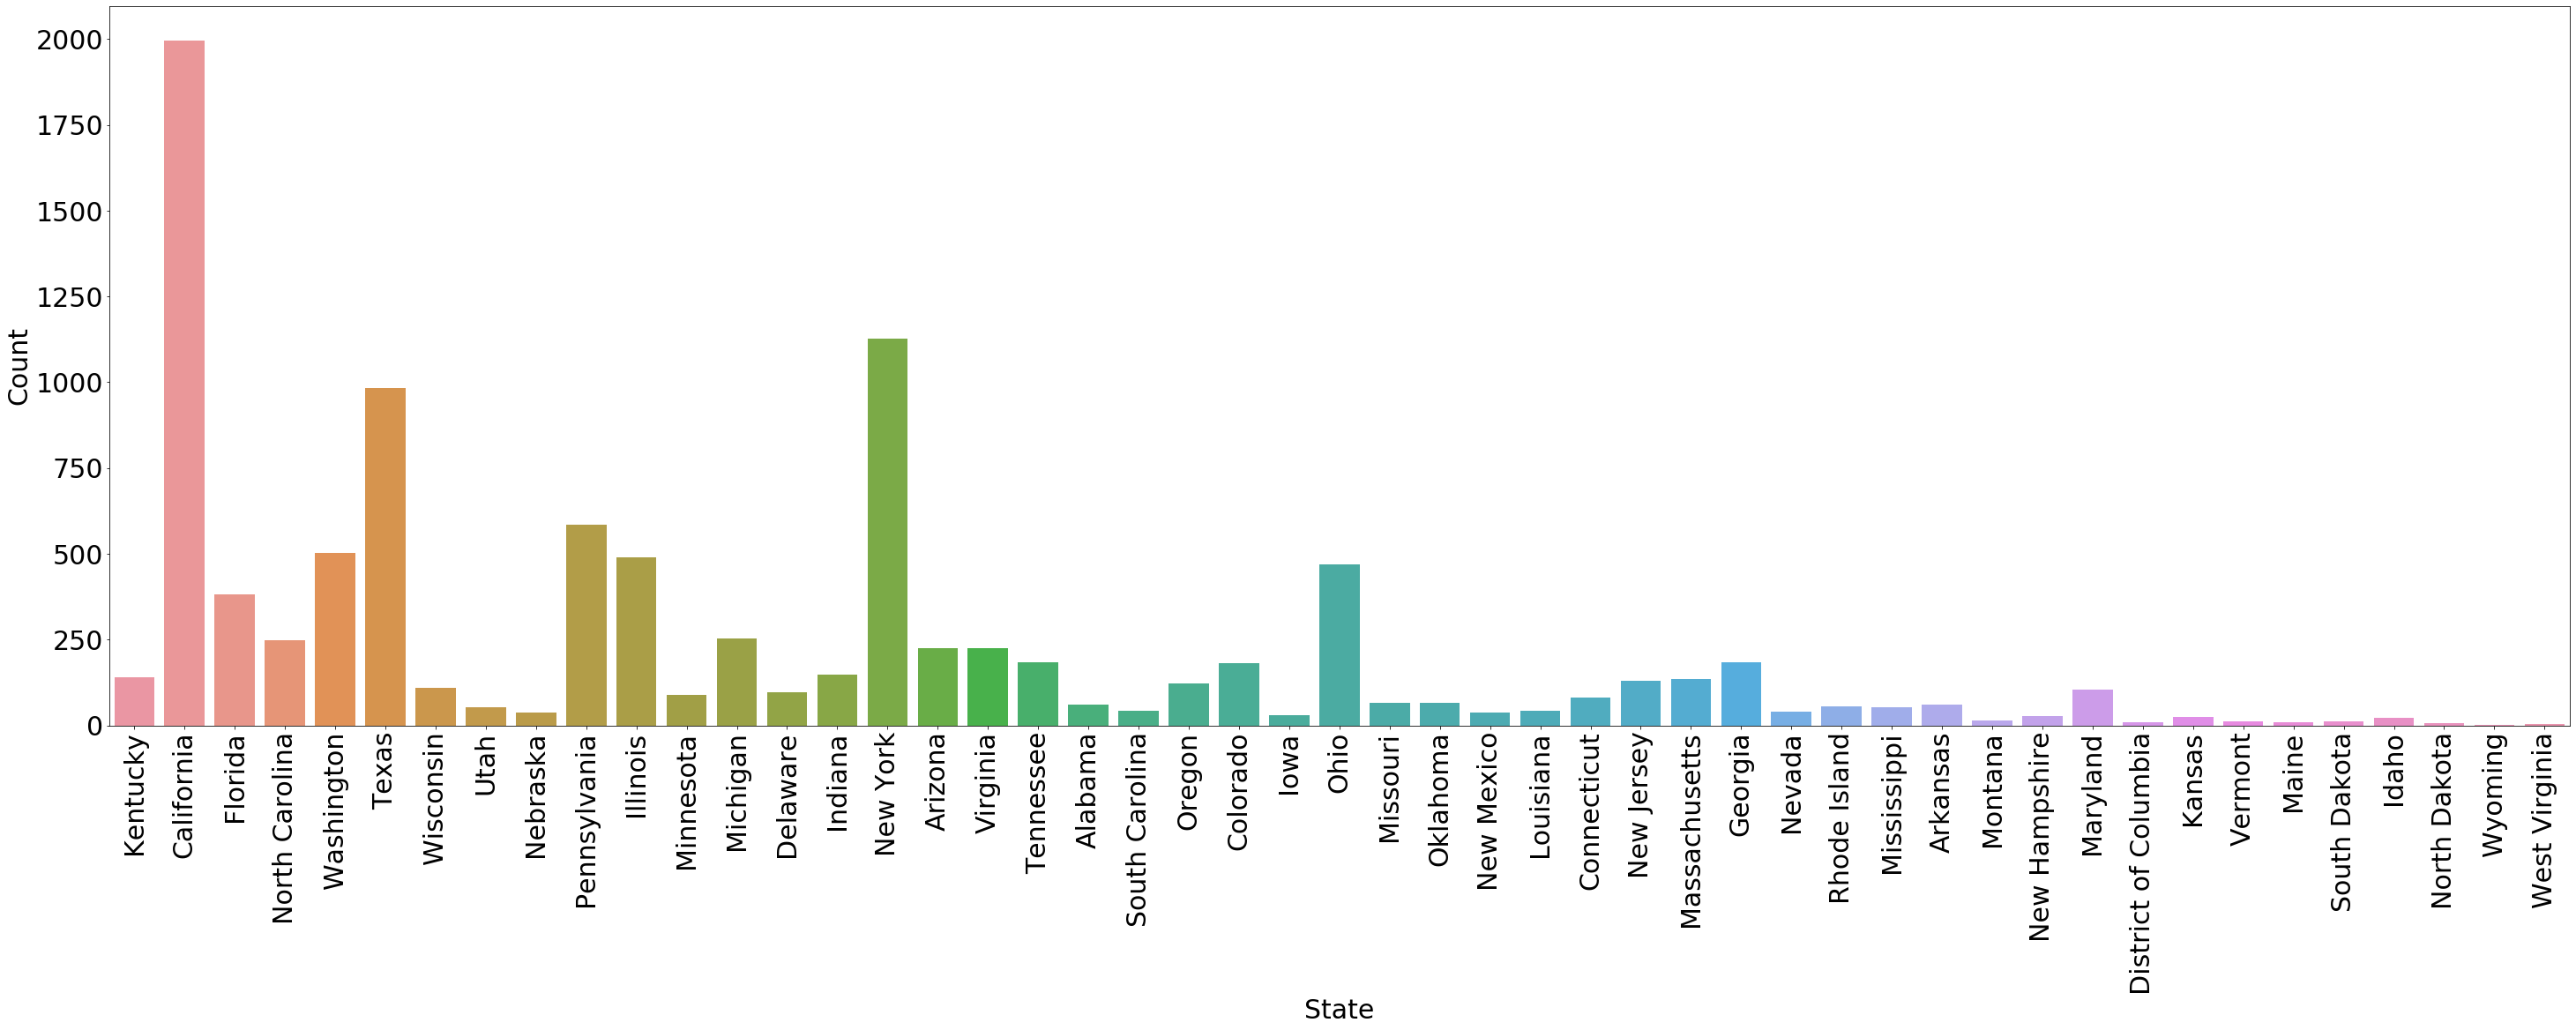

In [31]:
# Bar Chart for State
plt.figure(figsize=(50,15))
ed=sns.countplot(x="State", data=superstore)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('State', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.show()  

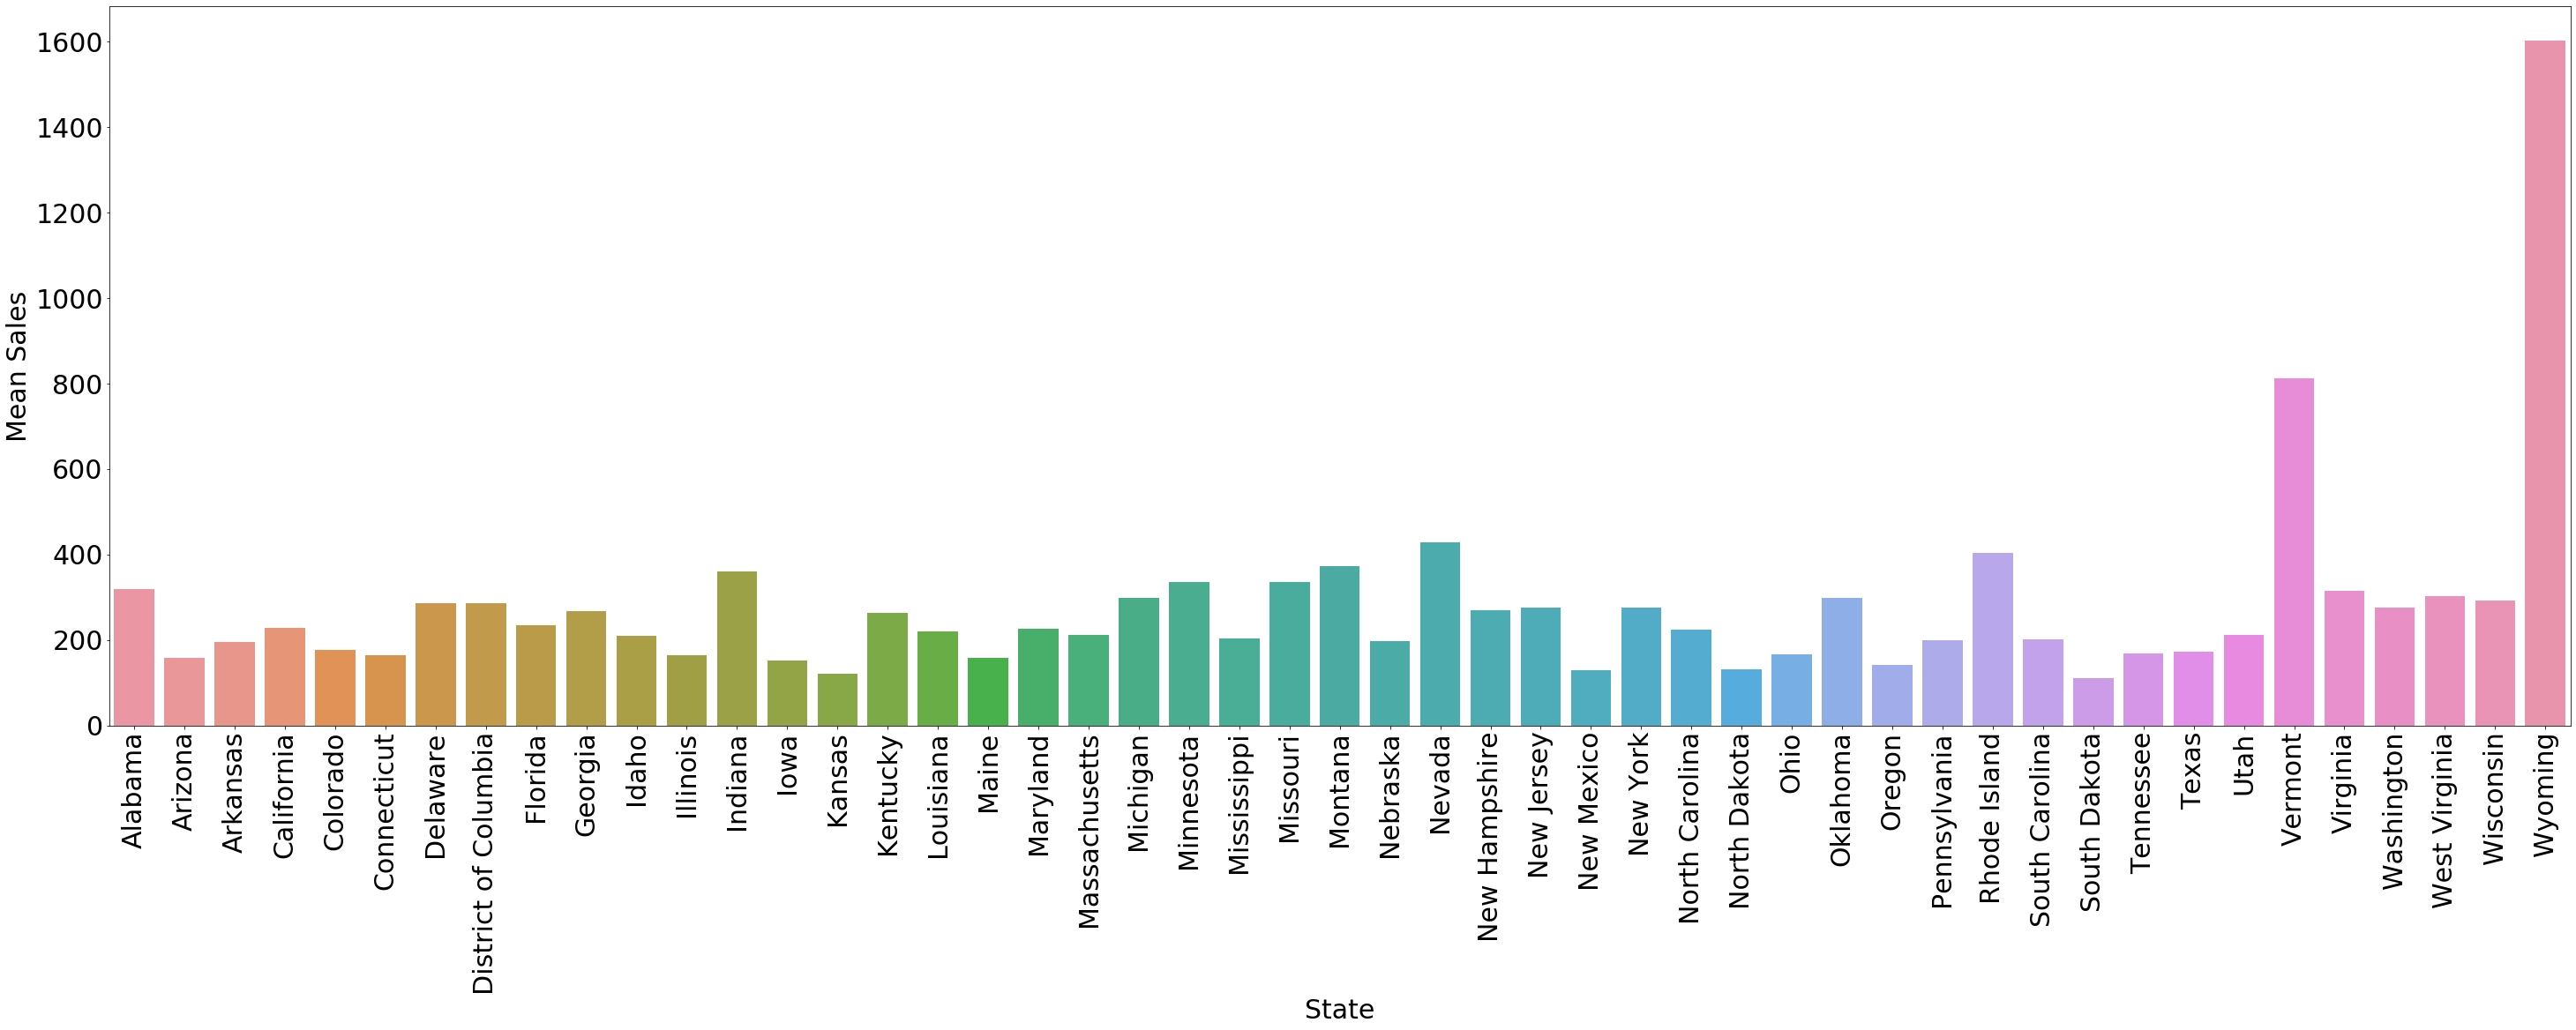

In [30]:
# Bar Chart between State and sales
plt.figure(figsize=(50,15))
state = superstore.groupby(['State'])['Sales'].mean().reset_index()
ed=sns.barplot(x = 'State', y='Sales', data=state)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('State', fontsize=30) 
plt.ylabel('Mean Sales', fontsize=30)
plt.show()


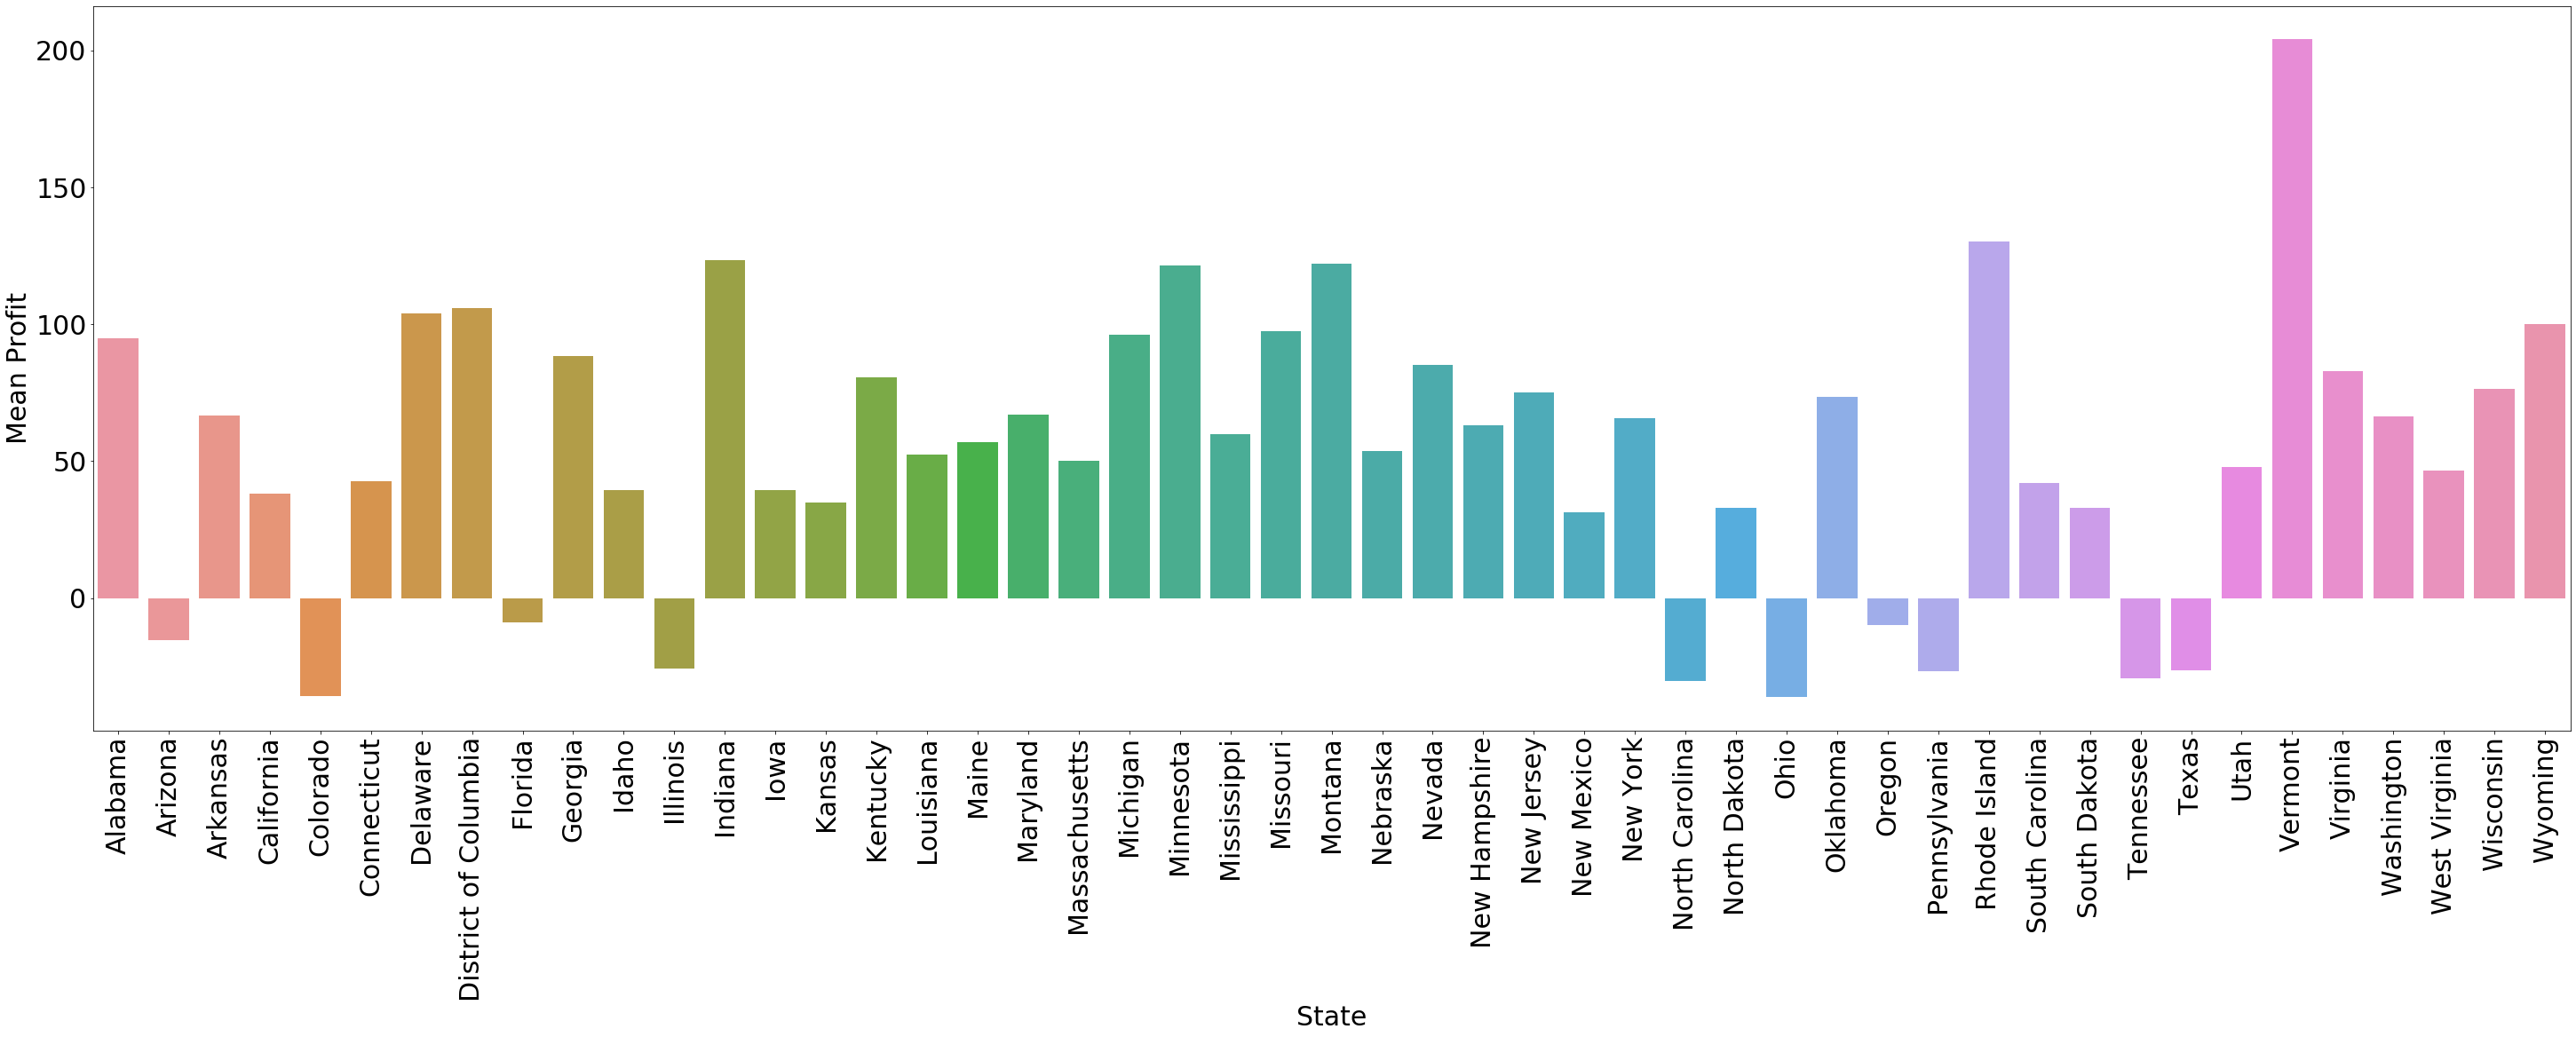

In [76]:
# Bar Chart between State and profit
plt.figure(figsize=(50,15))
state1 = superstore.groupby(['State'])['Profit'].mean().reset_index()
ed=sns.barplot(x = 'State', y='Profit', data=state1)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('State',fontsize=30) 
plt.ylabel('Mean Profit',fontsize=30)
plt.show()

1.California has the highest amount of sales but very less profits.

2.Vermount has the highest profits and has decent amount of sales as compared to other states.

3.Wyoming on the other hand has the highest sales but very limited profits.

4.Colorado, Arizona, Florida, Illinois, Texas, Tennessee, North Carolina are making losses

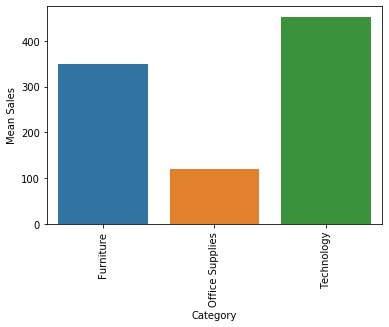

In [72]:
# Bar Chart between category and sales
category = superstore.groupby(['Category'])['Sales'].mean().reset_index()
ed=sns.barplot(x = 'Category', y='Sales', data=category)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Category') 
plt.ylabel('Mean Sales')
plt.show()

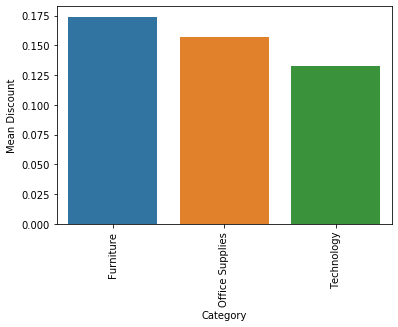

In [77]:
# Bar Chart between category and discount
category1 = superstore.groupby(['Category'])['Discount'].mean().reset_index()
ed=sns.barplot(x = 'Category', y='Discount', data=category1)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Category') 
plt.ylabel('Mean Discount')
plt.show()

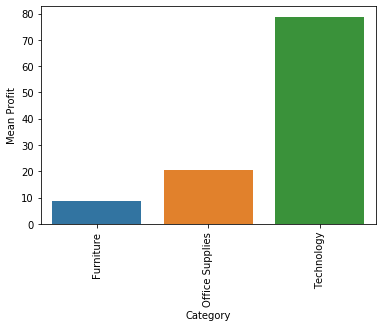

In [78]:
# Bar Chart between category and profit
category2 = superstore.groupby(['Category'])['Profit'].mean().reset_index()
ed=sns.barplot(x = 'Category', y='Profit', data=category2)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Category') 
plt.ylabel('Mean Profit')
plt.show()


1.Technology has the highest amount of sales and the makes the maximum profits

2.Office supplies gives a decent amount of discount but is not giving much profits and the category is unable to generate sales.

3.Furniture has a good amount of discount and sales but makes the lowest profits.

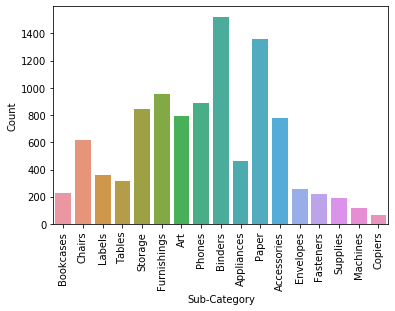

In [80]:
# Bar Chart for different sub categories
ed=sns.countplot(x="Sub-Category", data=superstore)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Sub-Category') 
plt.ylabel('Count')
plt.show()

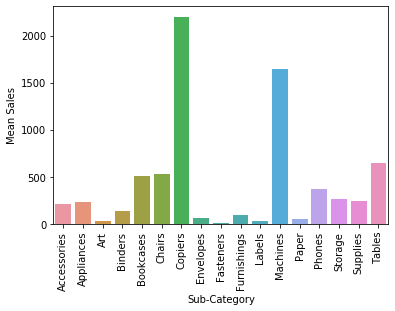

In [81]:
# Bar Chart between subcategory and sales
sub = superstore.groupby(['Sub-Category'])['Sales'].mean().reset_index()
ed=sns.barplot(x = 'Sub-Category', y='Sales', data=sub)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Sub-Category') 
plt.ylabel('Mean Sales')
plt.show()


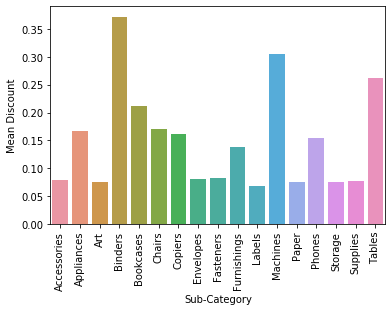

In [70]:
# Bar Chart between subcategory and discount
sub1 = superstore.groupby(['Sub-Category'])['Discount'].mean().reset_index()
ed=sns.barplot(x = 'Sub-Category', y='Discount', data=sub1)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Sub-Category') 
plt.ylabel('Mean Discount')
plt.show()

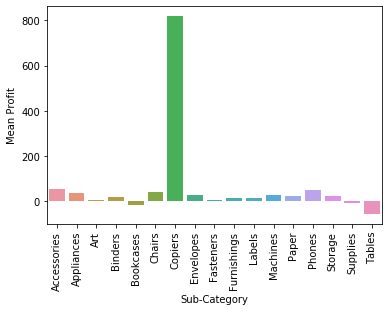

In [69]:
# Bar Chart between subcategory and profit
sub2 = superstore.groupby(['Sub-Category'])['Profit'].mean().reset_index()
ed=sns.barplot(x = 'Sub-Category', y='Profit', data=sub2)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Sub-Category') 
plt.ylabel('Mean Profit')
plt.show()

1.Copiers sub-category has highest sales ans has maximum profit from sub-categories.

2.Tables have very less sales and is running is losses

3.We need to cut down on discounts to generate some profits

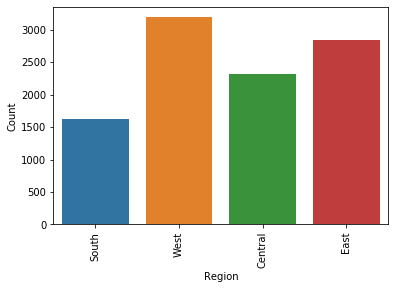

In [68]:
# Bar Chart counting different types of region
ed=sns.countplot(x="Region", data=superstore)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Region') 
plt.ylabel('Count')
plt.show()  


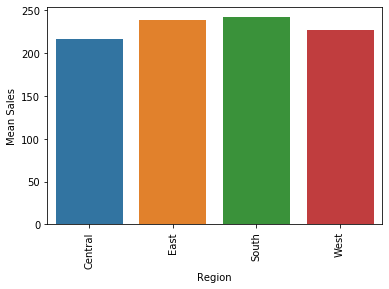

In [67]:
# Bar Chart between region and sales
reg = superstore.groupby(['Region'])['Sales'].mean().reset_index()
ed=sns.barplot(x = 'Region', y='Sales', data=reg)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Region') 
plt.ylabel('Mean Sales')
plt.show()

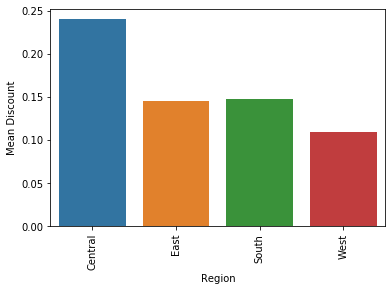

In [66]:
# Bar Chart between region and discount
reg1 = superstore.groupby(['Region'])['Discount'].mean().reset_index()
ed=sns.barplot(x = 'Region', y='Discount', data=reg1)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Region') 
plt.ylabel('Mean Discount')
plt.show()

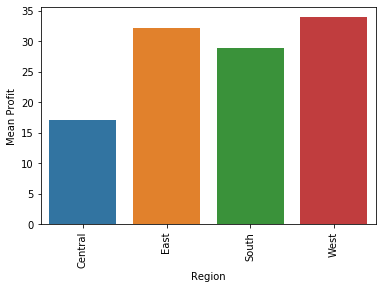

In [65]:
# Bar Chart between region and profit
reg2 = superstore.groupby(['Region'])['Profit'].mean().reset_index()
ed=sns.barplot(x = 'Region', y='Profit', data=reg2)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Region')
plt.ylabel('Mean Profit')
plt.show()


1.Central region has a decent amount of orders but gives the most discounts and thus has the lowest profits,
  Central region needs to cut down on discounts in order to earn more profits.
  
2.West region has a good amount of sales and the highest profits.

3.East region also has good amount of sales and 2nd highest profits.
                             

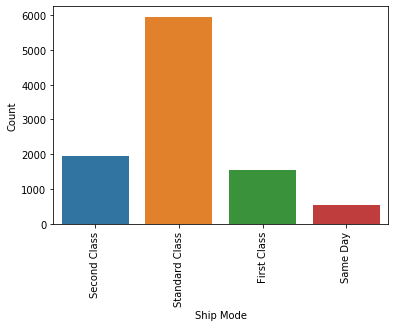

In [64]:
# Bar Chart counting different types of shipmode 
ed=sns.countplot(x="Ship Mode", data=superstore)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Ship Mode') 
plt.ylabel('Count')
plt.show()  

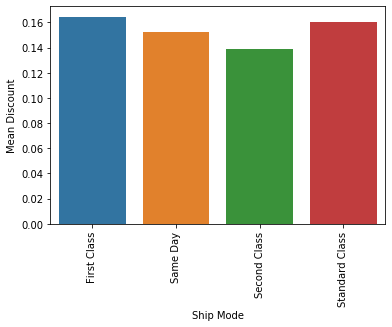

In [63]:
# Bar Chart between shipmode and discount
ship = superstore.groupby(['Ship Mode'])['Discount'].mean().reset_index()
ed=sns.barplot(x = 'Ship Mode', y='Discount', data=ship)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Ship Mode')
plt.ylabel('Mean Discount')
plt.show()


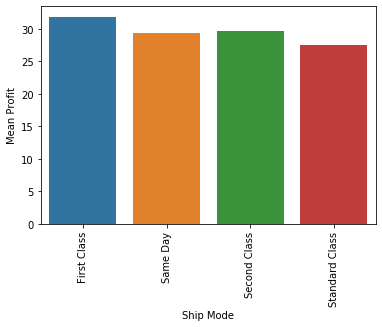

In [61]:
# Bar Chart between shipmode and profit
ship1 = superstore.groupby(['Ship Mode'])['Profit'].mean().reset_index()
ed=sns.barplot(x = 'Ship Mode', y='Profit', data=ship1)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xlabel('Ship Mode') 
plt.ylabel('Mean Profit')
plt.show()

1.Standard class is the most preferred mode of shipment.

2.Same day is not preferred much.

3.First class makes the highest profits.
                             

# We conclude our Exploratory data analysis for Superstore

# Thankyou